## Adaline

In [9]:
import pandas as pd
from data import *
plt.style.use('ggplot')

In [10]:
repetitions = 200
x_all = reproduce_x_times(x_unipolar, repetitions)
d_all = reproduce_x_times(d_bipolar, repetitions)
x_all = x_all + get_random_except_first_row(x_all.shape)
x_all[:, :5], d_all[:, :5]

(array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [ 0.03661162, -0.04556231,  0.95489217,  0.98919731, -0.03202867],
        [ 0.01097894,  0.98388205,  0.00895992,  0.95009617,  0.0180889 ]]),
 array([[-1, -1, -1,  1, -1]]))

In [11]:
test_size = int(x_all.shape[1] * 0.25)
train_size = int(x_all.shape[1] - test_size)
x_train, x_test = x_all[:, :train_size], x_all[:, train_size:]
d_train, d_test = d_all[:, :train_size], d_all[:, train_size:]
x_train.shape, x_test.shape, d_train.shape, d_test.shape

((3, 600), (3, 200), (1, 600), (1, 200))

In [12]:
x_range = np.arange(-2, 4)
experiments_numb = 100

In [13]:
perceptrons = []
for allowed_err in list(np.linspace(0.3, 1, num=300)):
    p = Adaline(x_train, d_train, x_test, d_test, 0.0001, allowed_err, (-0.1, 0.1))
    for i in range(experiments_numb):
        p.count()
    perceptrons.append(p)
len(perceptrons)

300

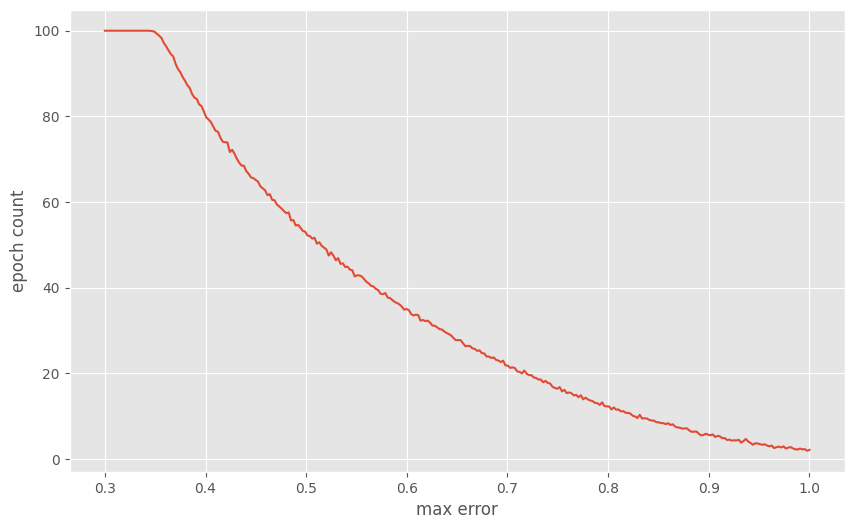

In [14]:
plt.gcf().set_size_inches(10, 6)
plt.plot([x.allowed_error for x in perceptrons], [x.average_epoch_count for x in perceptrons])
plt.xlabel("max error")
plt.ylabel("epoch count")
pd.DataFrame({"max error":[x.allowed_error for x in perceptrons], "epoch count":[x.average_epoch_count for x in perceptrons]});

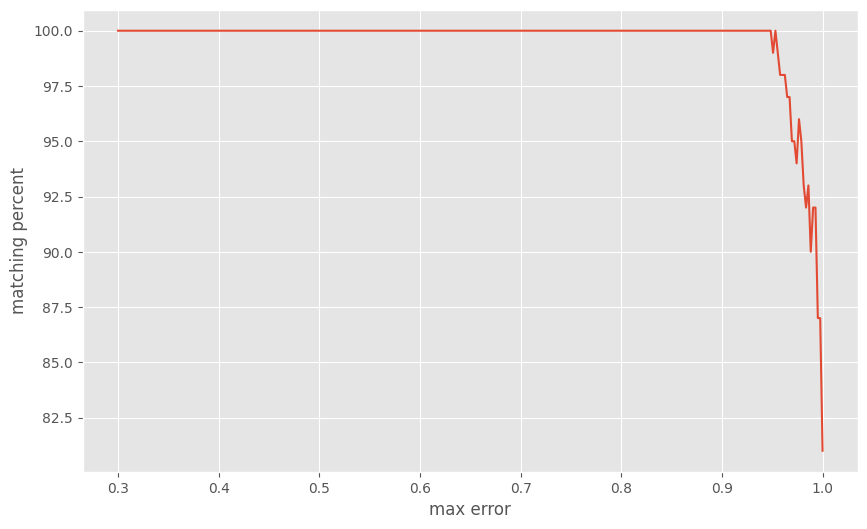

In [15]:
plt.gcf().set_size_inches(10, 6)
plt.plot([x.allowed_error for x in perceptrons], [x.average_matching_percent for x in perceptrons])
plt.xlabel("max error")
plt.ylabel("matching percent");

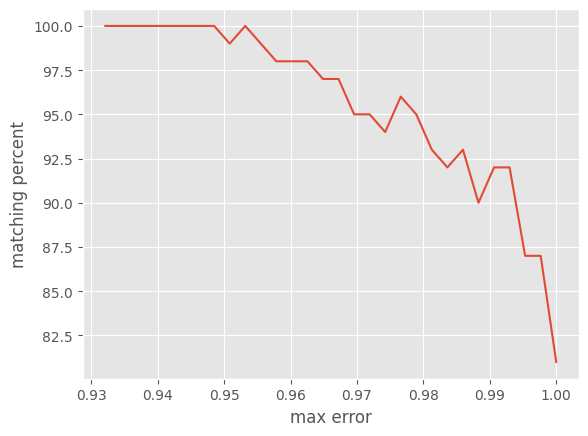

In [16]:
part_size = int(len(perceptrons) * 0.9)
plt.plot([x.allowed_error for x in perceptrons][part_size:], [x.average_matching_percent for x in perceptrons][part_size:])
plt.xlabel("max error")
plt.ylabel("matching percent");